In [12]:
file = 'Sloan_z.txt'
f = pd.read_table(file, comment='#', delim_whitespace=True, names=['wavelength','transmission'])
f

,wavelength,transmission
0,1100.0,95.865547
1,1099.5,95.903061
2,1099.0,95.951118
3,1098.5,95.956123
4,1098.0,96.009712
...,...,...
1796,202.0,-0.000642
1797,201.5,-0.000764
1798,201.0,-0.001438
1799,200.5,-0.001337


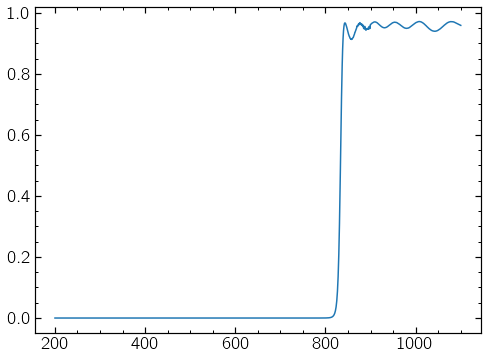

In [13]:
plt.plot(f['wavelength'],f['transmission']/100)

In [9]:
wavelength, transmission = np.array(f['wavelength']),np.array(f['transmission'])/100
hm = (0.5 * (np.max(transmission)-np.min(transmission))) + np.min(transmission)
signs = np.sign(np.add(transmission, -hm))
zero_crossings = (signs[0:-2] != signs[1:-1])
zero_crossings_i = np.where(zero_crossings)[0]
zero_crossings_i

array([1101, 1405])

In [11]:
from scipy.interpolate import interp1d
i = 0
# interpolate between the two values on either side of the half max value:
g = interp1d([transmission[zero_crossings_i[i]],transmission[zero_crossings_i[i]+1]],
             [wavelength[zero_crossings_i[i]],wavelength[zero_crossings_i[i]+1]])
hmlow = g(hm)
i = 1
g = interp1d([transmission[zero_crossings_i[i]],transmission[zero_crossings_i[i]+1]],
             [wavelength[zero_crossings_i[i]],wavelength[zero_crossings_i[i]+1]])
hmhigh = g(hm)
hmlow,hmhigh

(array(549.30665403), array(397.08701101))